In [1]:
import ipywidgets as widgets
from ipywidgets import IntSlider
from IPython.display import Markdown, display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("SuddecCardiacDeathv3.xlsx", header=[0, 1])
signal = df[df.columns[2]]
N = len(df.index)

fs = 1 / 0.001
# fh=12
# fl=5
# M=69
# Window='Blackman'
# Filter='High Pass Filter'

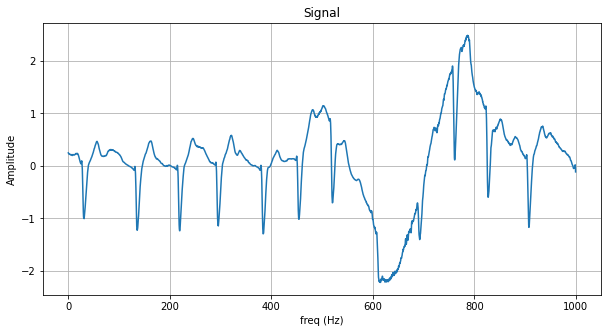

In [3]:
# looping
n = np.arange(0, N, 1)
k = np.arange(0, N, 1)

plt.figure(figsize=((10, 5)))
plt.plot(n * fs / N, signal[n])
plt.xlabel("freq (Hz)")
plt.ylabel("Amplitude")
plt.title("Signal")
plt.grid()

Text(0.5, 1.0, 'DFT')

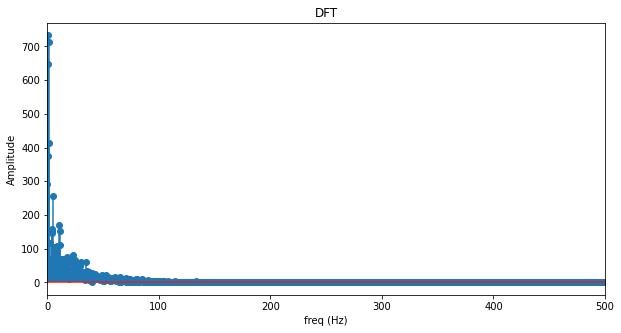

In [4]:
# initial array for DFT
X_real = np.zeros(N)
X_imaj = np.zeros(N)
MagDFT = np.zeros(N)

# DFT
for k in range(N):
    for n in range(N):
        X_real[k] += signal[n] * np.cos(2 * np.pi * k * n / N)
        X_imaj[k] += signal[n] * np.sin(2 * np.pi * k * n / N)
    MagDFT[k] = np.sqrt(np.square(X_real[k]) + np.square(X_imaj[k]))

# looping
n = np.arange(0, N, 1)
k = np.arange(0, N, 1)


plt.figure(figsize=((10, 5)))
plt.stem(k * fs / N, MagDFT[k])
plt.xlim(0, fs / 2)
plt.xlabel("freq (Hz)")
plt.ylabel("Amplitude")
plt.title("DFT")

In [6]:
def Filter(P, Window, M, fl, fh, fc):
    ohmfl = 2 * np.pi * fl / fs
    ohmfh = 2 * np.pi * fh / fs
    ohmfc = 2 * np.pi * fc / fs
    w = np.zeros(2 * M + 1)
    h = np.zeros(2 * M + 1)
    hw = np.zeros(2 * M + 1)
    y0 = np.zeros(N + 2 * M)
    y = np.zeros(N + 2 * M)
    for i in range(0, 2 * M + 1):
        signal[-i] = signal[0]
    for a in range(-M, M):
        if P == "LPF":
            for a in range(-M, M):
                h[a] = (np.sin(ohmfc * a)) / (a * np.pi)
            h[0] = ohmfc / np.pi
            h[M] = h[-M]
        if P == "HPF":
            for a in range(-M, M):
                h[a] = -1 * ((np.sin(ohmfc * a)) / (a * np.pi))
            h[0] = (np.pi - ohmfc) / np.pi
            h[M] = h[-M]
        if P == "BSF":
            for a in range(-M, M):
                h[a] = (-(np.sin(ohmfh * a) / a * np.pi)) + (
                    np.sin(ohmfl * a) / a * np.pi
                )
            h[0] = (np.pi - ohmfh + ohmfl) / np.pi
            h[M] = h[-M]
        if P == "BPF":
            for a in range(-M, M):
                h[a] = (np.sin(ohmfh * a) / (a * np.pi)) - (
                    np.sin(ohmfl * a) / (a * np.pi)
                )
            h[0] = (ohmfh - ohmfl) / np.pi
            h[M] = h[-M]
    for i in range(-M, M):
        if Window == "Rectangular":
            w[i] = 1
        if Window == "Bartlett (triangular)":
            w[i] = 1 - abs(i) / M
        if Window == "Hanning":
            w[i] = 0.5 + 0.5 * np.cos(i * np.pi / M)
        if Window == "Hamming":
            w[i] = 0.54 + 0.46 * np.cos(i * np.pi / M)
        if Window == "Blackman":
            w[i] = 0.42 + 0.5 * np.cos(i * np.pi / M) + 0.08 * np.cos(2 * i * np.pi / M)
        # filter koef

    for i in range(-M, M):
        hw[i] = h[i] * w[i]

    for n in range(0, N - 1):
        for i in range(0, (2 * M + 1)):
            y0[n] += hw[i - M] * signal[n - i]

    for n in range(N - 1, -1, -1):
        for i in range(2 * M, -1, -1):
            y[n] += hw[i - M] * y0[n + i]

    n = np.arange(-M, M + 1)
    g = np.arange(0, N, 1, dtype=int)
    fig, axs = plt.subplots(4, figsize=(13, 20))
    axs[0].plot(g / fs, signal[g], "orange")
    axs[0].set_title("Sinyal Input", fontweight="bold", size=14)
    axs[1].stem(n, h[n], "aqua")
    axs[1].set_title("Respon Impluse h", fontweight="bold", size=14)
    axs[2].stem(n, hw[n], "crimson")
    axs[2].set_title("Respon Impluse hw", fontweight="bold", size=14)
    axs[3].plot(g / fs, y[g], "violet")
    axs[3].set_title("Sinyal Output", fontweight="bold", size=14)
    for ax in axs.flat:
        ax.set(xlabel="i sample", ylabel="h(i)")
        ax.grid()
    return y


# widget
P = widgets.Dropdown(options=["LPF", "HPF", "BPF", "BSF"], value="BSF")
Window = widgets.Dropdown(
    options=["Rectangular", "Bartlett (triangular)", "Hanning", "Hamming", "Blackman"],
    value="Blackman",
)
M = widgets.IntSlider(min=2, max=100, step=1, description="Lebar Filter")
fc = widgets.IntSlider(min=0, max=200, step=1, description="Fc")
fl = widgets.IntSlider(min=0, max=200, step=1, description="Fc Low")

fh = widgets.IntSlider(min=0, max=300, step=1, description="Fc High")
widgets.interact_manual(Filter, P=P, Window=Window, M=M, fl=fl, fh=fh, fc=fc)

interactive(children=(Dropdown(description='P', index=3, options=('LPF', 'HPF', 'BPF', 'BSF'), value='BSF'), D…

<function __main__.Filter(P, Window, M, fl, fh, fc)>